In [1]:
!pip install pmdarima

     ---------------------------------------- 0.0/630.3 kB ? eta -:--:--
     -------------------------------------- 630.3/630.3 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached Cython-3.0.11-cp313-cp313-win_amd64.whl.metadata (3.2 kB)
Using cached Cython-3.0.11-cp313-cp313-win_amd64.whl (2.8 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.1 MB 13.8 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.1 MB 14.9 MB/s eta 0:00:01
   ----------------------------------- --

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [41 lines of output]
  Partial import of pmdarima during the build process.
  
  Requirements: ['joblib>=0.11\nCython>=0.29,!=0.29.18,!=0.29.31\nnumpy>=1.21.2\npandas>=0.19\nscikit-learn>=0.22\nscipy>=1.3.2\nstatsmodels>=0.13.2\nurllib3\nsetuptools>=38.6.0,!=50.0.0\npackaging>=17.1  # Bundled with setuptools, but want to be explicit\n']
  Adding extra setuptools args
  Setting up with setuptools
  Traceback (most recent call last):
    File "C:\Users\dariu\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
      ~~~~^^
    File "C:\Users\dariu\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\dariu\AppData\Loca

In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

plt.style.use("ggplot")
rcParams["figure.figsize"] = [12, 9]
rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15
rcParams["font.size"] = 15

warnings.filterwarnings("ignore")

## 1.1.Imputation

In [3]:

from sklearn.impute import SimpleImputer


imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])


df = [[10, np.nan, 9], [4, np.nan, 6], [np.nan, 2, 3]]
print(imp_mean.transform(df))
imp_mean

[[10.   3.5  9. ]
 [ 4.   3.5  6. ]
 [ 7.   2.   3. ]]


SimpleImputer()

## **1. Decompozycja szeregów czasowych**
Każdy rozkład szeregu czasowego ma 3 podstawowe składniki:

1. **Sezonowość** - czy dane mają wyraźny cykliczny lub okresowy wzorzec?
2. **Trend** - czy dane pokazują ogólny wzrost lub spadek?
3. **Szum** - jakie są wartości odstające lub brakujące, które nie pasują do reszty danych?

Dezorganizacja szeregu czasowego na te składniki nazywana jest **dekompozycją**, którą szczegółowo omówimy.

1. Załaduj i przeanalizuj zestawy danych `tps` i `meat`. Zobrazuj dane szeregów czasowych.
    
    - Użyj wykresów liniowych, aby zaobserwować wzorce w czasie.
    - Wyróżnij oczywiste wzorce sezonowe w danych (np. święta w `tps` lub cykliczne trendy w spożyciu mięsa).

In [9]:
tps = pd.read_csv(
    "./train.csv",
    parse_dates=["date_time"], index_col="date_time"
)
print(tps.shape)
tps.head()

(7111, 11)


,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
date_time,,,,,,,,,,,
2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


Text(0, 0.5, 'Degrees Celcius')

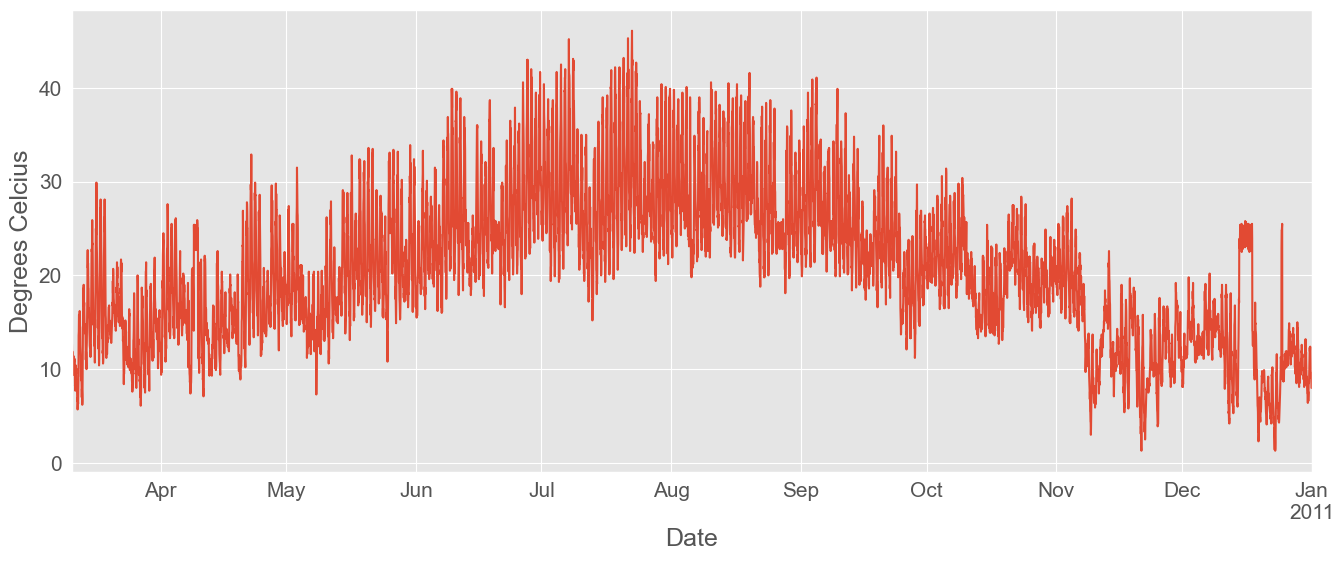

In [10]:

tps["deg_C"].plot(figsize=(16, 6), fontsize=15)
plt.xlabel("Date")
plt.ylabel("Degrees Celcius")

In [11]:
# Load meat production dataset in the USA
meat = pd.read_csv(
    "https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch4_meat.csv",
    parse_dates=["date"], index_col="date")
meat.to_csv('ch4_meat.csv')
meat.head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


In [12]:
meat.index.min(),meat.index.max()

(Timestamp('1944-01-01 00:00:00'), Timestamp('2012-11-01 00:00:00'))

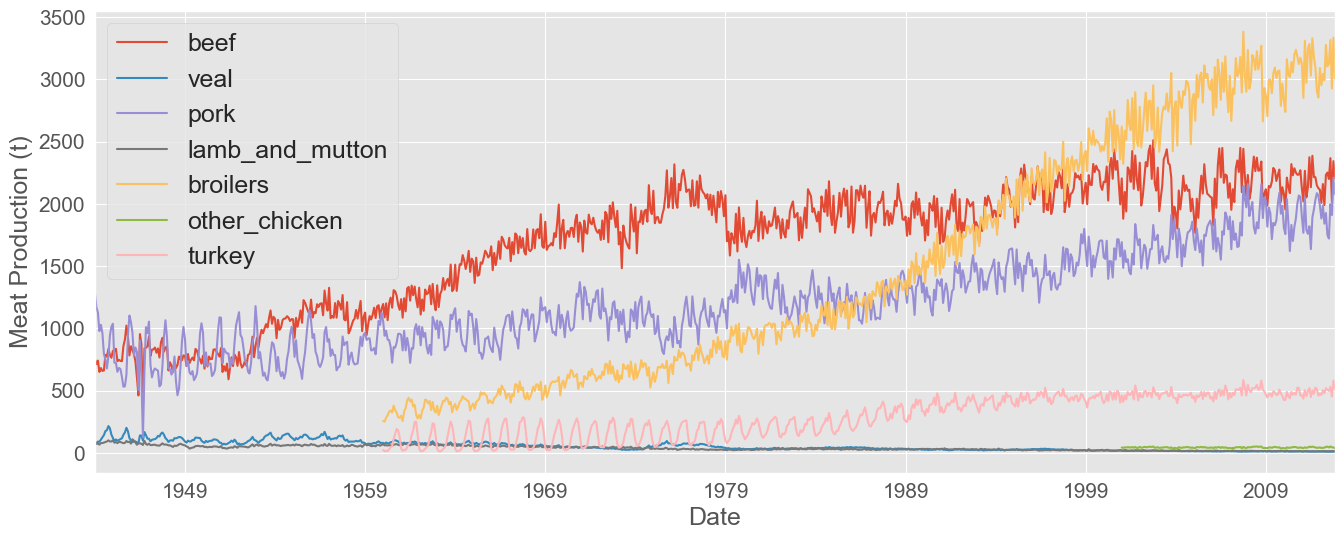

In [13]:
# write code to plot "meat" DataFrame
meat.plot(figsize=(16, 6))
plt.legend(fontsize="large")
plt.xlabel("Date")
plt.ylabel("Meat Production (t)");

2. Przeprowadź dekompozycję sezonową za pomocą biblioteki `statsmodels`:

Aby znaleźć ukryte wzorce sezonowe w powyższym szeregach czasowych, użyjemy funkcji 'seasonal_decompose' z biblioteki 'statsmodels':

<Axes: xlabel='date'>

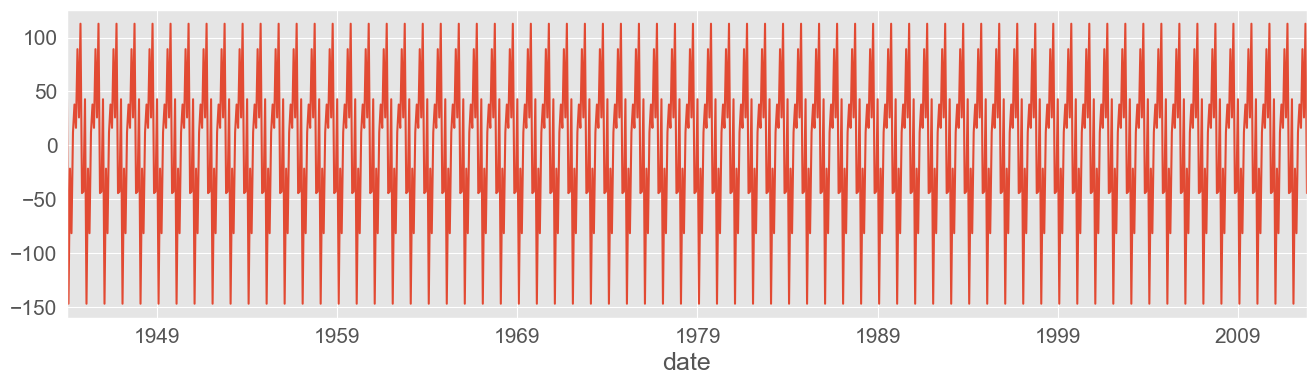

In [14]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(meat['beef']) # continue with seasonal decompose

rcParams["figure.figsize"] = 16, 4
# plot decomposition
decomposition.seasonal.plot()

In [15]:
print(decomposition.seasonal.shape)
decomposition.seasonal

(827,)


date
1944-01-01     42.785427
1944-02-01   -146.812673
1944-03-01    -21.567146
1944-04-01    -81.417943
1944-05-01     12.015942
                 ...    
2012-07-01     16.268393
2012-08-01     89.220109
2012-09-01     25.893393
2012-10-01    112.801114
2012-11-01    -44.254524
Name: seasonal, Length: 827, dtype: float64

Używając `sma.tsa.seasonal_decompose` na szeregu czasowym 'beef', otrzymujemy obiekt typu DecomposeResult, który posiada atrybuty takie jak sezonowość, trend oraz reszty (które będą szczegółowo wyjaśnione później).

Powyżej rysujemy sezonowość, ale ten wykres nie jest zbyt użyteczny, ponieważ zawiera zbyt dużo szumu. Wybierzmy odpowiedni przedział, aby nadać linii więcej przestrzeni.

### **1.1 Analiza sezonowości**
- Co to jest sezonowość?
- Jak zidentyfikować cykliczne wzorce w danych?
- Interaktywny wykres: Wykrywanie sezonowości w danych rzeczywistych
- Ćwiczenie: Analiza sezonowości na przykładzie (np. dane miesięczne o sprzedaży)

<Axes: xlabel='date'>

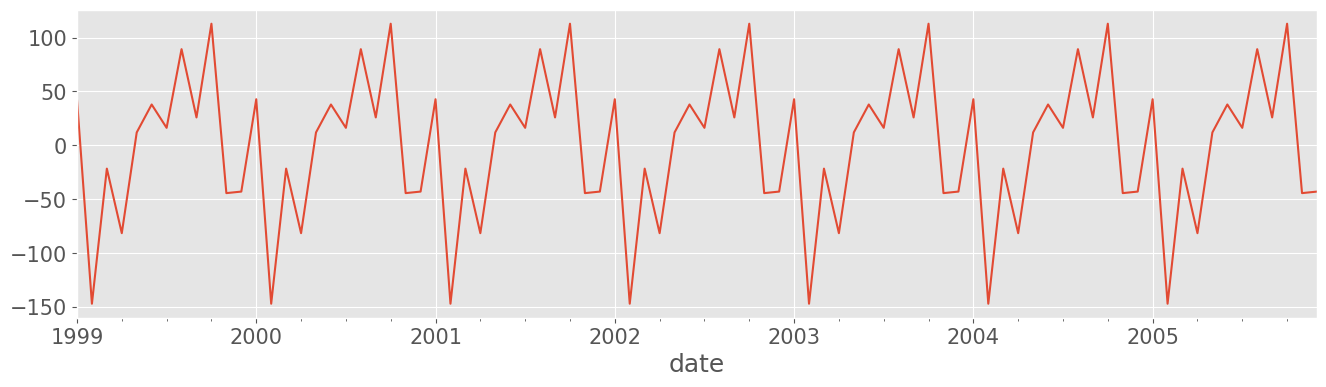

In [12]:
# the latest 6 years of data, to see patterns closer
decomposition.seasonal["1999":"2005"].plot()

Ten wykres pokazuje, że produkcja wołowiny rzeczywiście spada na początku każdego roku, ale osiąga swoje szczyty pod koniec.

Uwaga dotycząca funkcji seasonal_decompose: domyślnie generuje ona małe wykresy. </br> Musisz samodzielnie kontrolować jej aspekty, ponieważ funkcja plot nie akceptuje</br> większości standardowych parametrów Matplotlib.

Teraz, stwórzmy wykres sezonowości dla wszystkich rodzajów mięsa w 5-letnim okresie:

#####**Zadanie 1:**

Napisz kod, który dla każdego rodzaju mięsa w zbiorze danych `meat` wykona dekompozycję sezonowości, zapisując wyniki w słowniku `seasonality_dict`. Następnie stwórz wykres, który pokaże sezonowość dla każdego rodzaju mięsa w latach 2000-2005.

{'beef': date
 1944-01-01   NaN
 1944-02-01   NaN
 1944-03-01   NaN
 1944-04-01   NaN
 1944-05-01   NaN
               ..
 2012-07-01   NaN
 2012-08-01   NaN
 2012-09-01   NaN
 2012-10-01   NaN
 2012-11-01   NaN
 Name: resid, Length: 827, dtype: float64,
 'veal': date
 1944-01-01   NaN
 1944-02-01   NaN
 1944-03-01   NaN
 1944-04-01   NaN
 1944-05-01   NaN
               ..
 2012-07-01   NaN
 2012-08-01   NaN
 2012-09-01   NaN
 2012-10-01   NaN
 2012-11-01   NaN
 Name: resid, Length: 827, dtype: float64,
 'pork': date
 1944-01-01   NaN
 1944-02-01   NaN
 1944-03-01   NaN
 1944-04-01   NaN
 1944-05-01   NaN
               ..
 2012-07-01   NaN
 2012-08-01   NaN
 2012-09-01   NaN
 2012-10-01   NaN
 2012-11-01   NaN
 Name: resid, Length: 827, dtype: float64,
 'lamb_and_mutton': date
 1944-01-01   NaN
 1944-02-01   NaN
 1944-03-01   NaN
 1944-04-01   NaN
 1944-05-01   NaN
               ..
 2012-07-01   NaN
 2012-08-01   NaN
 2012-09-01   NaN
 2012-10-01   NaN
 2012-11-01   NaN
 Name: resid

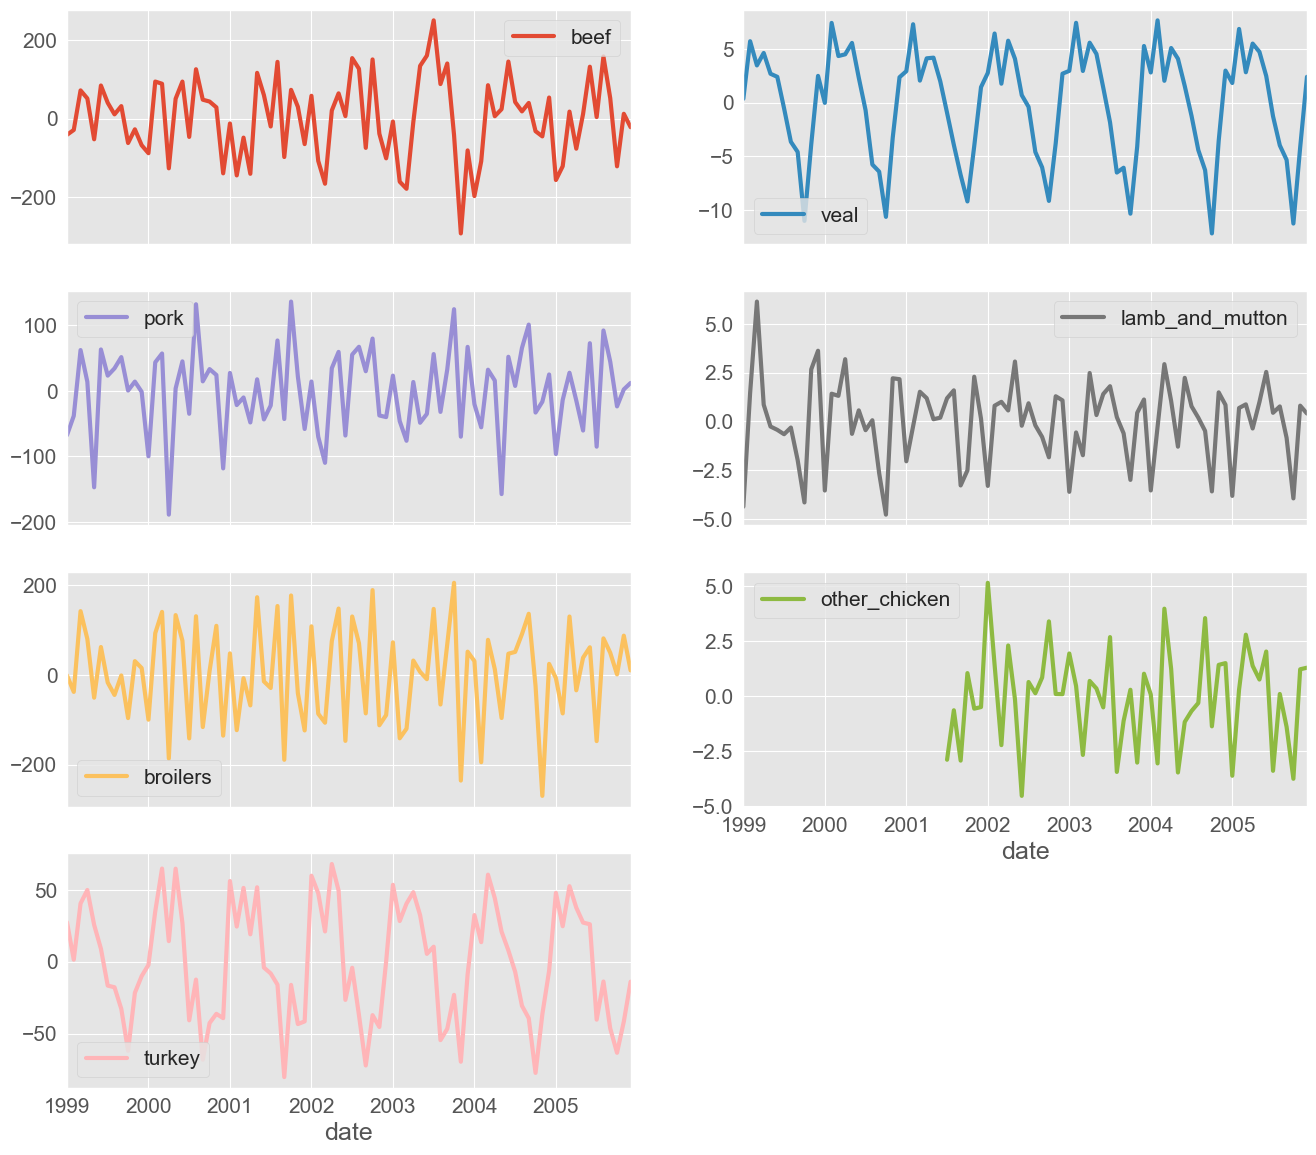

In [20]:
# Inicializujemy słownik rzeby przechowywać decompose results
seasonality_dict = {}

for ts in meat.columns:
  decomposition = sm.tsa.seasonal_decompose(meat[ts].dropna())
  seasonality_dict[ts] = decomposition.resid

for col in meat.columns:
    decomposition = sm.tsa.seasonal_decompose(meat[col].dropna())
    seasonality_dict[col] = decomposition.resid

# Plot
rcParams["figure.figsize"] = 16, 14
pd.DataFrame(seasonality_dict)["1999":"2005"].plot(
    subplots=True, layout=(4, 2), linewidth=3
)
seasonality_dict

Jak widać, różne rodzaje mięsa mają dość różne wzorce sezonowości. Teraz przeanalizujmy trendy.

### **1.2 Analiza trendu**
- Co to jest trend w danych?
- Jak określić, czy dane mają tendencję wzrostu lub spadku?
- Interaktywny wykres: Przewidywanie trendów na podstawie danych historycznych
- Ćwiczenie: Wykrywanie trendów na przykładzie (np. ceny akcji)

Ponownie, ogólny trend szeregu czasowego pokazuje, czy wartość wzrosła, spadła, czy pozostała stała (płaska) w danym okresie. Powyższy obiekt `DecomposeResult` zawiera wartości, które pokazują ogólny nachylenie szeregu czasowego w atrybucie `trend`.

Teraz, stwórzmy wykresy dla zestawu danych dotyczącego produkcji mięsa:

#####**Zadanie 2:**

Napisz kod, który dla każdego rodzaju mięsa w zbiorze danych `meat` wykona dekompozycję szeregu czasowego i zapisze wyniki trendu w słowniku `trend_dict`. Następnie, dla każdego typu mięsa, wyświetl wynik trendu (po usunięciu brakujących wartości) oraz stwórz wykres, który pokaże trend dla wszystkich rodzajów mięsa. Wykorzystaj odpowiedni układ i rozmiar wykresu.

In [ ]:
trend_dict = {}

for ts in meat.columns:

In [ ]:
print(trend_dict['beef'].shape)
trend_dict['beef'].dropna()

Ten wykres jest znacznie bardziej informacyjny w porównaniu do prostego wykresu liniowego, który widzieliśmy na początku. Rzeczywiście, teraz widzimy, że produkcja mięsa z jagniąt i cieląt spadła dramatycznie od lat 40-tych XX wieku.

Może to być częściowo spowodowane dwukrotnymi lub trzykrotnymi wzrostami produkcji wołowiny, kurczaków brojlery oraz indyka. Na razie dokonujemy wstępnych przypuszczeń, ale w kolejnych sekcjach zapoznamy się z potężnymi metodami, które pozwolą nam zweryfikować te hipotezy.

### **1.3 Szum**
- Co to jest szum w szeregach czasowych?
- Jak identyfikować i radzić sobie z wartościami odstającymi i brakującymi danymi?
- Interaktywny wykres: Wykrywanie szumu w danych
- Ćwiczenie: Usuwanie lub radzenie sobie z szumem w danych (np. uzupełnianie brakujących danych)

Trzecią składową szeregu czasowego jest szum. Nie ma w nim nic szczególnego, jak w przypadku pozostałych dwóch składników. Pokazuje jedynie losowe i nieregularne punkty danych, których nie można przypisać ani do sezonowości, ani do trendu.

Możesz je zobaczyć, korzystając z atrybutu `resid` obiektu `DecomposeResult`:

#####**Zadanie 3 :**

Napisz kod, który dla każdego rodzaju mięsa w zbiorze danych `meat` wykona dekompozycję szeregu czasowego i zapisze wyniki szumu w słowniku `resid_dict`. Następnie stwórz wykres, który pokaże szum dla wszystkich rodzajów mięsa. Wykorzystaj odpowiedni układ wykresów i ustaw linię o grubości 1.

In [ ]:
resid_dict = {}

for ts in meat.columns:

> Wywołanie funkcji `plot` na całym obiekcie `DecomposeResult` spowoduje wygenerowanie wykresu, na którym wszystkie składniki będą wyświetlone na tych samych osiach.

Dekompozycja szeregów czasowych pomaga w bardziej uporządkowanym myśleniu o danych. Zamiast traktować szereg czasowy jako wartość zmieniającą się w czasie, można go postrzegać jako rozkład z określonym sygnałem sezonowym lub jako cechę z określonym nachyleniem. Tego typu zrozumienie danych może być kluczowe podczas inżynierii cech i modelowania.

## **2. Praca z wieloma szeregami czasowymi**

### **2.1 Ogólne zasady pracy z wieloma szeregami**
- Dlaczego warto pracować z wieloma szeregami czasowymi?
- Jak porównywać różne serie czasowe?
- Porównanie dwóch szeregów czasowych(wykresy)

Praca z wieloma szeregami czasowymi wiąże się z pewnymi wyzwaniami. Jednym z przykładów, jak widzieliśmy, jest różnica w skalach, w jakich występują poszczególne rozkłady:

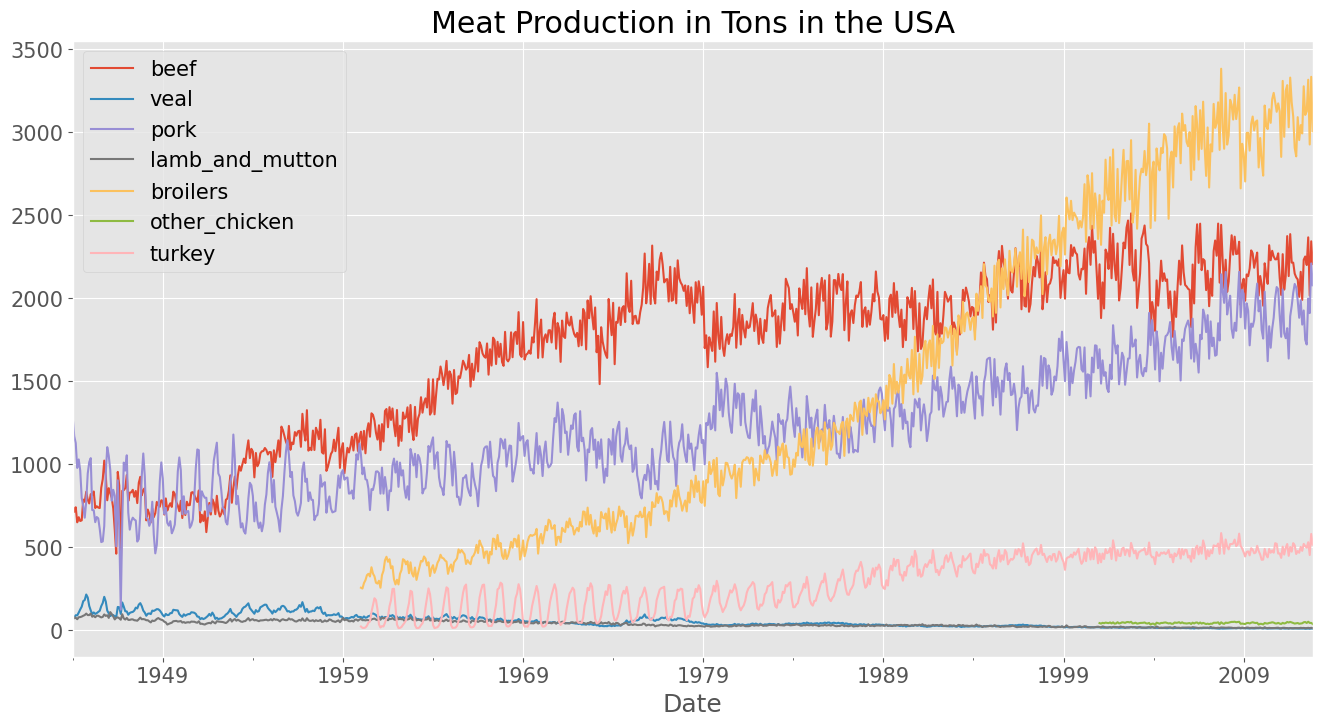

In [26]:
meat.plot(figsize=(16, 8), title="Meat Production in Tons in the USA")
plt.xlabel("Date");

Kiedy cechy o większych skalach „spłaszczają” inne do linii poziomej (jak w przypadku mięsa jagnięcego i cielęcego), niemożliwe staje się porównanie ich wzrostu. Jednym z rozwiązań jest użycie normalizacji.

Podczas normalizacji szeregów czasowych dzieli się każdą wartość danych w rozkładzie przez pierwszą próbkę. Efektem tego jest przedstawienie każdego punktu danych jako procentowego wzrostu względem pierwszej próbki:

In [27]:
meat.head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


In [28]:
meat.iloc[0]

,1944-01-01
beef,751.0
veal,85.0
pork,1280.0
lamb_and_mutton,89.0
broilers,NaN
other_chicken,NaN
turkey,NaN


In [29]:
meat.div(meat.iloc[0]).head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
1944-02-01,0.949401,0.905882,0.913281,0.808989,NaN,NaN,NaN
1944-03-01,0.986684,1.058824,0.881250,0.842697,NaN,NaN,NaN
1944-04-01,0.865513,1.047059,0.764062,0.741573,NaN,NaN,NaN
1944-05-01,0.906791,1.247059,0.803906,0.876404,NaN,NaN,NaN


Najlepsza część polega na tym, że teraz każdy rozkład ma tę samą skalę. Teraz, stwórzmy wykres danych produkcji mięsa, wykonując normalizację:

#####**Zadanie 4:**

Napisz kod, który przeprowadzi normalizację danych produkcji mięsa, dzieląc każdy punkt danych przez pierwszy pomiar i mnożąc przez 100, aby uzyskać procentowy wzrost. Następnie stwórz wykres, który pokazuje wzrost produkcji w różnych sektorach mięsa w formie procentowej. Ustaw odpowiedni tytuł, etykiety osi oraz rozmiar wykresu.

Text(0, 0.5, 'Increase (%)')

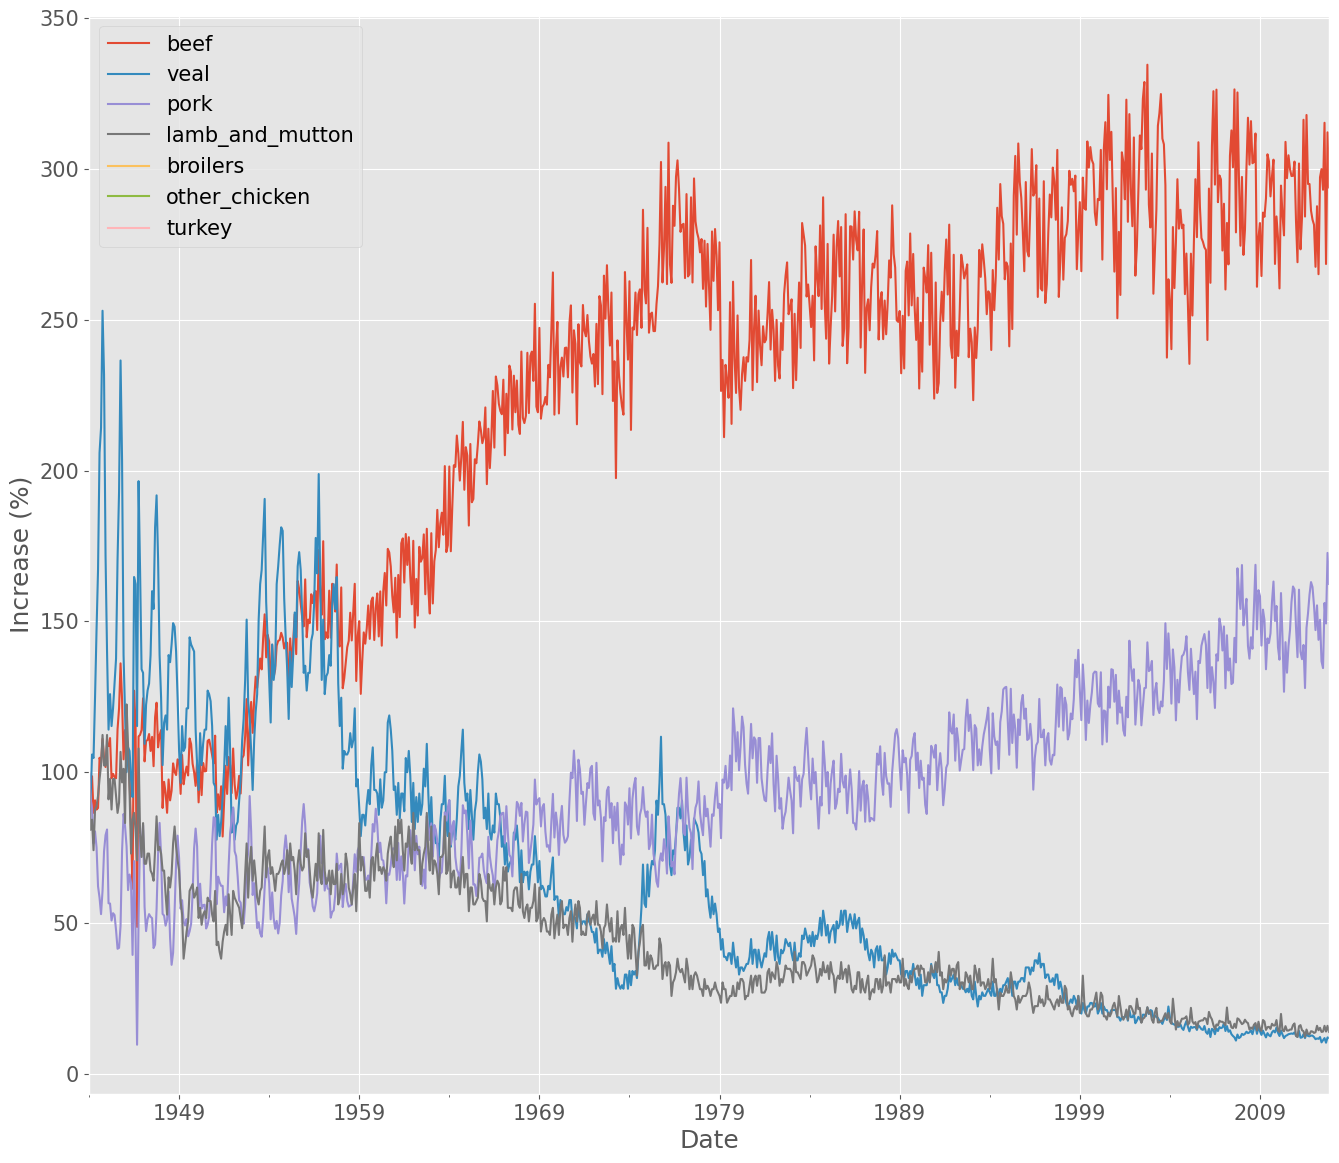

In [30]:
# Multiply by 100 to get percentages
normalized = meat.div(meat.iloc[0]).mul(100)

normalized.plot()
plt.xlabel("Date")
plt.ylabel("Increase (%)")

Text(0, 0.5, 'Increase (%)')

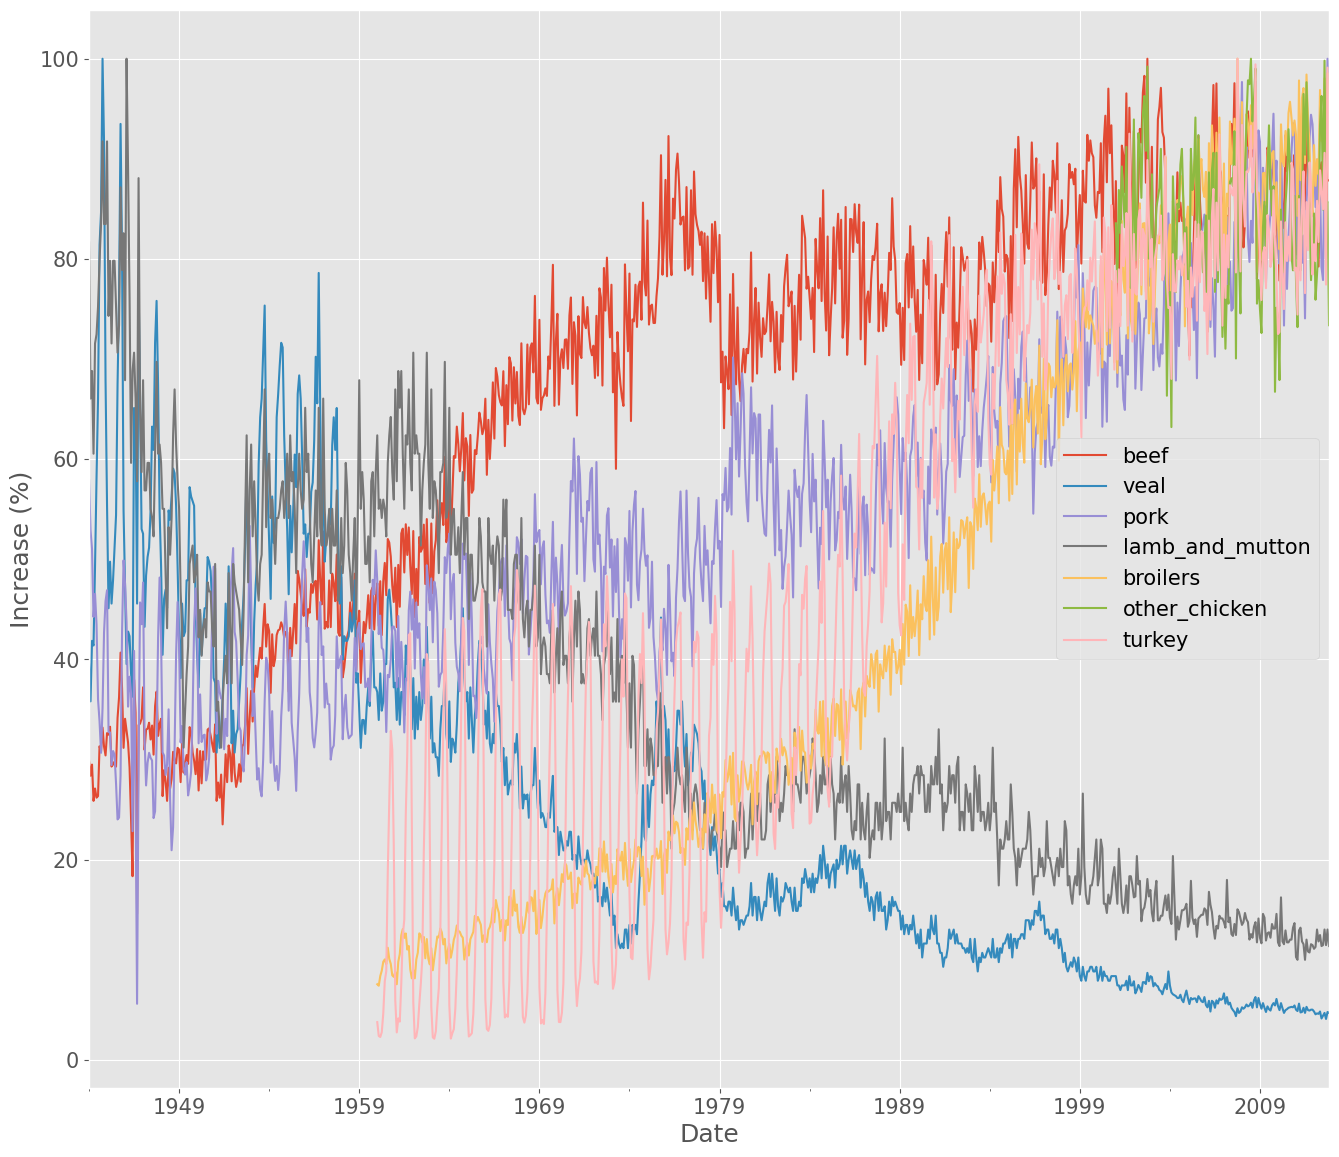

In [31]:
normalized = meat.div(meat.max()).mul(100)

normalized.plot()
plt.xlabel("Date")
plt.ylabel("Increase (%)")

Wołowina i wieprzowina odnotowały najwyższe procentowe wzrosty, podczas gdy produkcja mięsa cielęcego i jagnięcego spadła drastycznie w analizowanym okresie.

### 2.2 Zależności między szeregami czasowymi za pomocą korelacji


Wiem, co myślisz: „Korelacja? Naprawdę? Co nowego….”

Ale poczekaj chwilę. Prosta mapa cieplna korelacji rzeczywiście może wiele powiedzieć o liniowych zależnościach między zmiennymi:

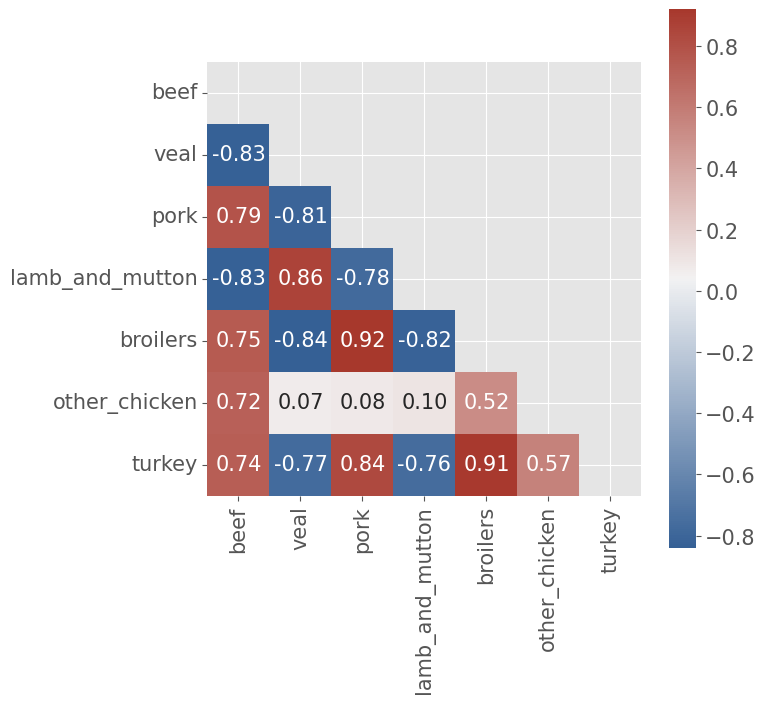

In [32]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = meat.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

#####**Zadanie 5:**

- Użyj dekompozycji sezonowości dla każdego szeregu czasowego w zbiorze `meat` i zapisz wyniki w słowniku `seasonality_dict`.
- Oblicz macierz korelacji dla sezonowości i wyświetl ją na mapie cieplnej z hierarchicznym grupowaniem za pomocą `sns.clustermap`.

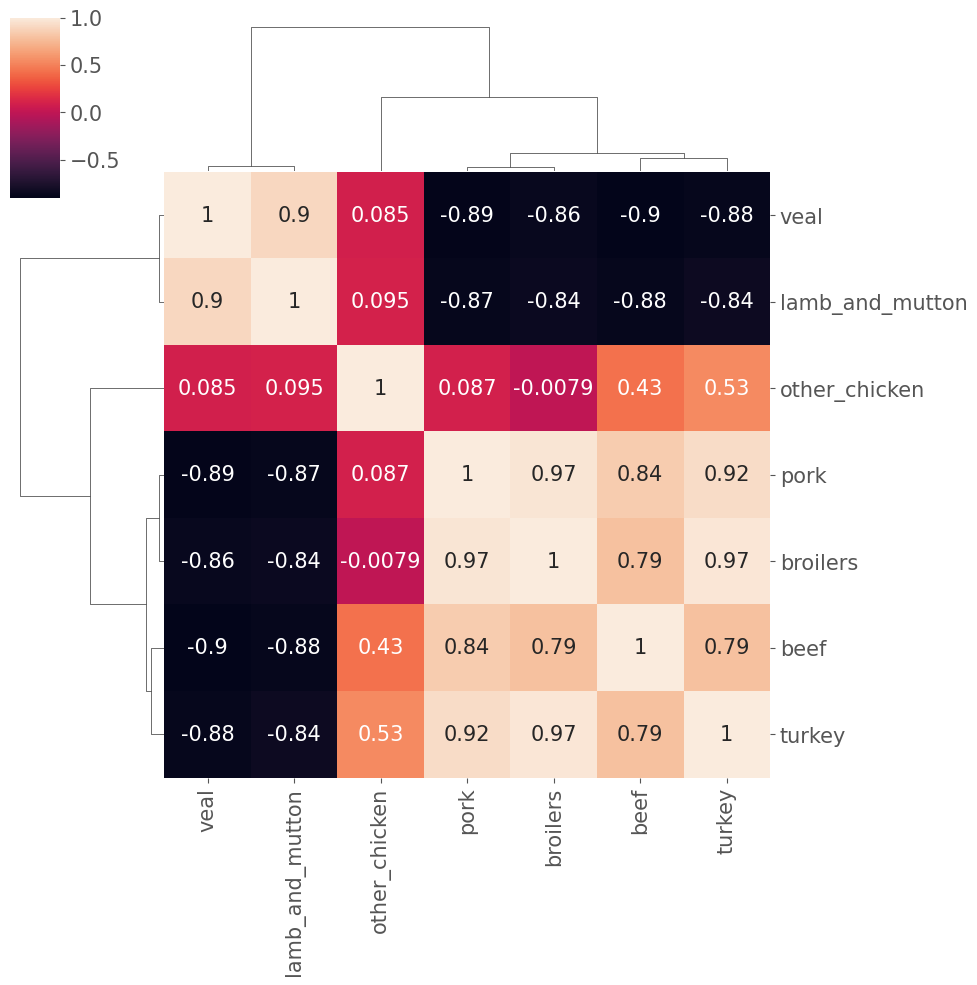

In [36]:
seasonality_dict = {
    ts: sm.tsa.seasonal_decompose(meat[ts].dropna()).trend for ts in meat.columns
}

seasonality_corr = pd.DataFrame(seasonality_dict).corr(method="pearson")


sns.clustermap(seasonality_corr, annot=True, square=True)

Tym razem używamy `ClusterMap` zamiast mapy cieplnej, aby natychmiast zobaczyć grupy mocno skorelowane z pomocą dendrogramów.

Wykres pokazuje, że sezonowość wołowiny, brojlerów i innych mięs drobiowych jest silnie skorelowana. Podobnie jest w przypadku wieprzowiny i mięsa jagnięcego/owczego. Ta pozytywna korelacja może wskazywać na bliskie dopasowanie sezonowości.

Na przykład, możliwe jest, że wzorce wzrostu/spadku produkcji wołowiny, brojlerów i innych mięs drobiowych często były zgodne w analizowanym okresie.

Teraz zróbmy to samo dla trendów, które moim zdaniem powinny być bardziej interesujące.

#####**Zadanie 6 :**

- Użyj dekompozycji trendu dla każdego szeregu czasowego w zbiorze `meat` i zapisz wyniki w słowniku `trend_dict`.
- Oblicz macierz korelacji dla tych trendów i wyświetl ją na mapie cieplnej z hierarchicznym grupowaniem za pomocą `sns.clustermap`.

Powyższy wykres jest świetny, ponieważ pomaga zweryfikować nasze przypuszczenia z sekcji analizy trendu. Spójrzmy teraz ponownie na znormalizowany wykres produkcji mięsa:

In [ ]:
normalized = meat.div(meat.iloc[0]).mul(100)

normalized.plot(figsize=(16, 8), title="Growth of Production in Different Meat Sectors")
plt.xlabel("Date")
plt.ylabel("Increase (%)")

## **3. Autokorelacja i autokorelacja częściowa**



### 3.1 Autokorelacja
Autokorelacja to potężne narzędzie analityczne do modelowania danych szeregów czasowych. Jak sama nazwa wskazuje, polega na obliczaniu współczynnika korelacji. Jednak zamiast obliczać go pomiędzy dwiema cechami, korelacja szeregu czasowego jest obliczana z opóźnioną wersją samego siebie.

Spójrzmy najpierw na przykład wykresu i wyjaśnijmy to bardziej szczegółowo:

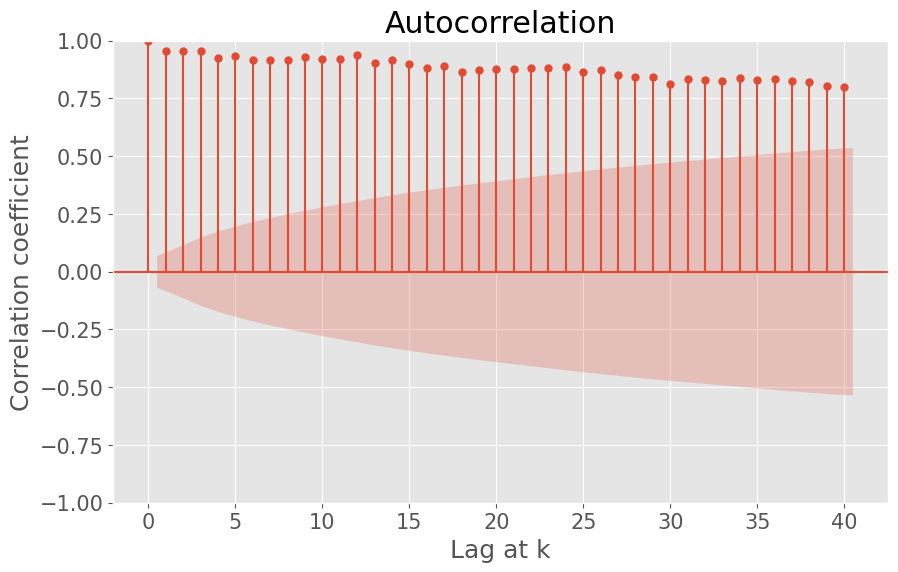

In [40]:
from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 10, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(meat['beef'], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

In [ ]:
meat["beef"].head()

Oś X wykresu funkcji autokorelacji (ACF) to numer opóźnienia \( k \). Na przykład, gdy \( k = 1 \), korelacja jest obliczana przez przesunięcie szeregu o 1. To jest to samo, co użycie funkcji `shift` w Pandas:

In [41]:
beef = meat["beef"].to_frame(name="beef")

beef["lag_1"] = beef["beef"].shift(periods=1)
beef["lag_2"] = beef["beef"].shift(periods=2)
beef["lag_3"] = beef["beef"].shift(periods=3)

beef.head()

,beef,lag_1,lag_2,lag_3
date,,,,
1944-01-01,751.0,NaN,NaN,NaN
1944-02-01,713.0,751.0,NaN,NaN
1944-03-01,741.0,713.0,751.0,NaN
1944-04-01,650.0,741.0,713.0,751.0
1944-05-01,681.0,650.0,741.0,713.0


Oś Y na wykresie ACF przedstawia wartość korelacji dla każdego opóźnienia \( k \). Zacieniony czerwony obszar to przedział ufności – jeśli wysokość słupków wykracza poza ten obszar, oznacza to, że korelacja jest *statystycznie istotna*.

Zatrzymaj się na chwilę i zastanów się, co możesz wywnioskować z wykresu ACF.

Wykresy ACF oferują alternatywny sposób wykrywania wzorców i sezonowości. Na przykład, wykres ACF temperatury w stopniach Celsjusza pokazuje, że korelacja zmniejsza się co każde 15 opóźnienie, lub zwiększa się co każde 25 opóźnienie.

Gdy w szeregu czasowym istnieje wyraźny trend, autokorelacja ma tendencję do bycia wysoką przy małych opóźnieniach, takich jak 1 lub 2. Gdy występuje sezonowość, autokorelacja wzrasta okresowo przy większych opóźnieniach.

Spójrzmy teraz na inny przykład:

In [ ]:
tps.head()

### Zadanie 7:
- Użyj funkcji `plot_acf` z biblioteki `tsaplots`, aby stworzyć wykres autokorelacji dla szeregu czasowego `target_carbon_monoxide` z opóźnieniami do 70.
- Dodaj tytuł wykresu „Autokorelacja tlenku węgla” oraz etykiety osi „Lag at k” i „Współczynnik korelacji”.
- Wyświetl wykres.

In [ ]:
# CODE: autocorelation lags here

plt.title("Autocorrelation of Carbon Monoxide")
# CODE: plot here


ACF (Autocorrelation Function) dla tlenku węgla potwierdza, że małe opóźnienia mają tendencję do wysokich korelacji. Pokazuje również, że co każde 25 opóźnienie korelacja znacząco wzrasta, ale szybko spada do wartości ujemnych. Jednak większość opóźnionych słupków znajduje się wewnątrz zacienionego obszaru, co sugeruje, że *nie są one statystycznie istotne*.

Ta zdolność do porównywania zależności między danymi z przeszłości a obecnymi punktami danych daje unikalną przewagę. Jeśli potrafisz powiązać obecną wartość z punktami sprzed k okresów, oznacza to, że możesz znaleźć zależność do wartości, które pojawią się po k okresach.

Ponadto, zrozumienie autokorelacji jest kluczowe przy modelowaniu szeregów czasowych za pomocą modeli ARIMA .

### 3.2 Autokorelacja częściowa

Chociaż omawianie autokorelacji częściowej oznacza, że wyprzedzamy pewne etapy, dam Ci ogólne wyjaśnienie.

Jest to podobne do autokorelacji – oblicza się ją używając szeregu czasowego i jego opóźnionej wersji przy opóźnieniu \( k \).

In [ ]:
tps.head()

### Zadanie 8:
- Użyj funkcji `plot_pacf` z biblioteki `tsaplots`, aby stworzyć wykres autokorelacji częściowej dla szeregu czasowego `target_benzene` z opóźnieniami do 70.
- Dodaj tytuł wykresu „Autokorelacja Częściowa Benzen” oraz etykiety osi „Lag at k” i „Współczynnik korelacji”.
- Wyświetl wykres.

Text(0.5, 1.0, 'Partial Autocorrelation of Benzene')

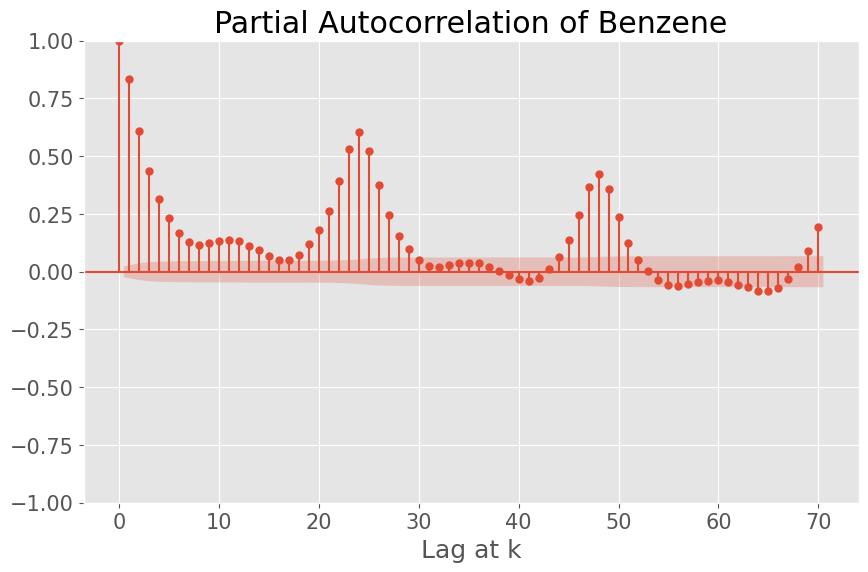

In [43]:
# Mind the extra 'p' in plot_pacf
fig = tsaplots.plot_acf(tps['target_benzene'], lags=70, alpha=0.05)

plt.xlabel("Lag at k")
plt.title("Partial Autocorrelation of Benzene")

Text(0.5, 1.0, 'Partial Autocorrelation of Benzene')

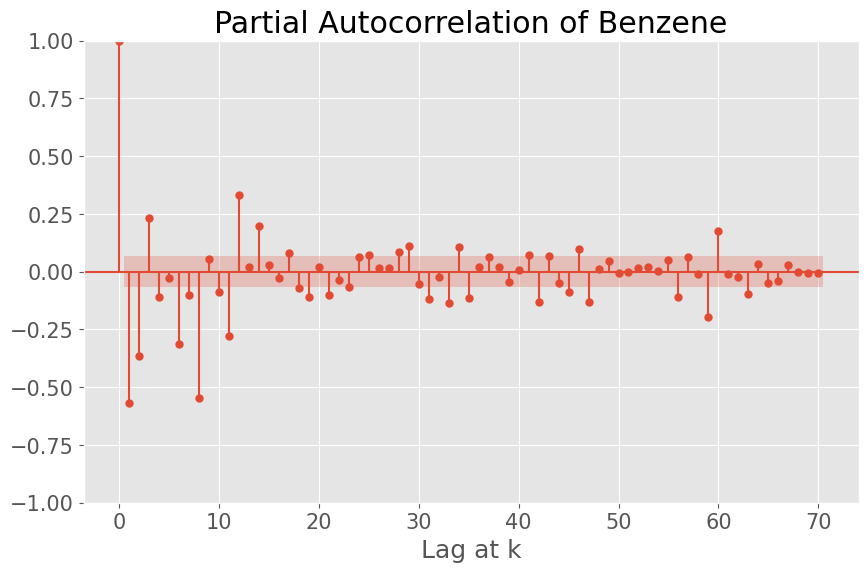

In [78]:
# Mind the extra 'p' in plot_pacf
fig = tsaplots.plot_pacf(meat['beef'].diff().dropna(), lags=70, alpha=0.05)

plt.xlabel("Lag at k")
plt.title("Partial Autocorrelation of Benzene")


Jedyną różnicą jest to, że ta metoda stara się uwzględnić wpływ, jaki mają interwencyjne opóźnienia. Na przykład, przy opóźnieniu 3, autokorelacja częściowa usuwa wpływ, jaki mają opóźnienia 1 i 2 na obliczanie korelacji.

Podczas gdy autokorelacja jest przydatna do analizowania właściwości szeregu czasowego i wyboru typu modelu ARIMA, autokorelacja częściowa wskazuje, jaki rząd modelu autoregresyjnego należy dopasować.

### 3.3 ARIMA ręcznie

Używając wiedzy o danych uzyskanej z dekompozycji, możemy spróbować samodzielnie znaleźć optymalne parametry.



In [71]:
check_stationarity(meat['beef'].diff().dropna(), name=meat['beef'].name)

    Augmented Dickey-Fuller Test on "beef" 
    -----------------------------------------------
ADF Statistic: -7.559837
p-value: 0.000000
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
Stationary


<Axes: xlabel='date'>

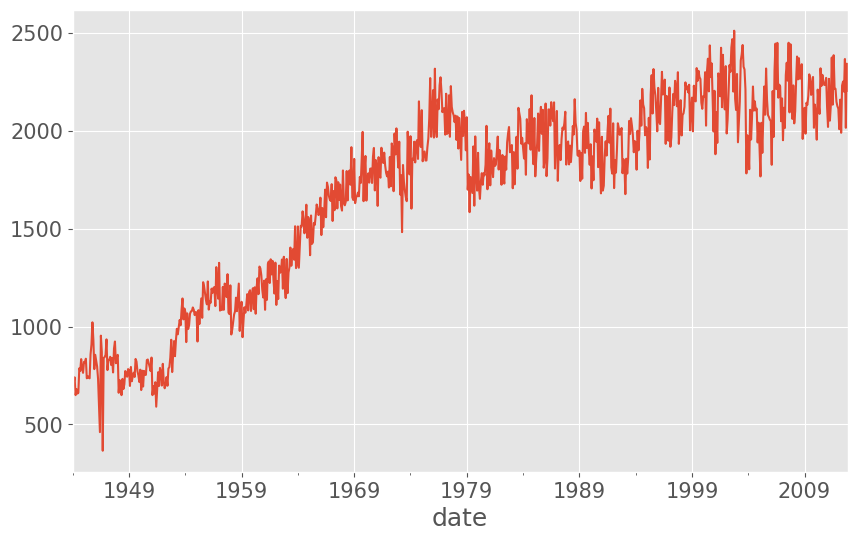

In [73]:
meat['beef'].plot()

<Axes: xlabel='date'>

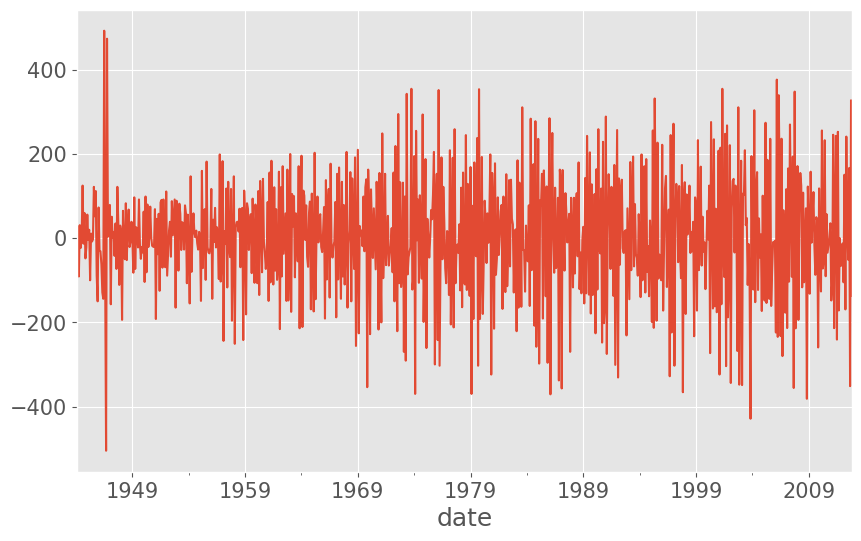

In [72]:
meat['beef'].diff().dropna().plot()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(meat[:"2002"]['beef'], order=(13, 1, 3))
fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [84]:
forecast_steps = 12
forecast = fit.get_forecast(steps=forecast_steps)

predicted_mean = forecast.predicted_mean

conf_int = forecast.conf_int()

lower_bound = conf_int.iloc[:, 0]
upper_bound = conf_int.iloc[:, 1]

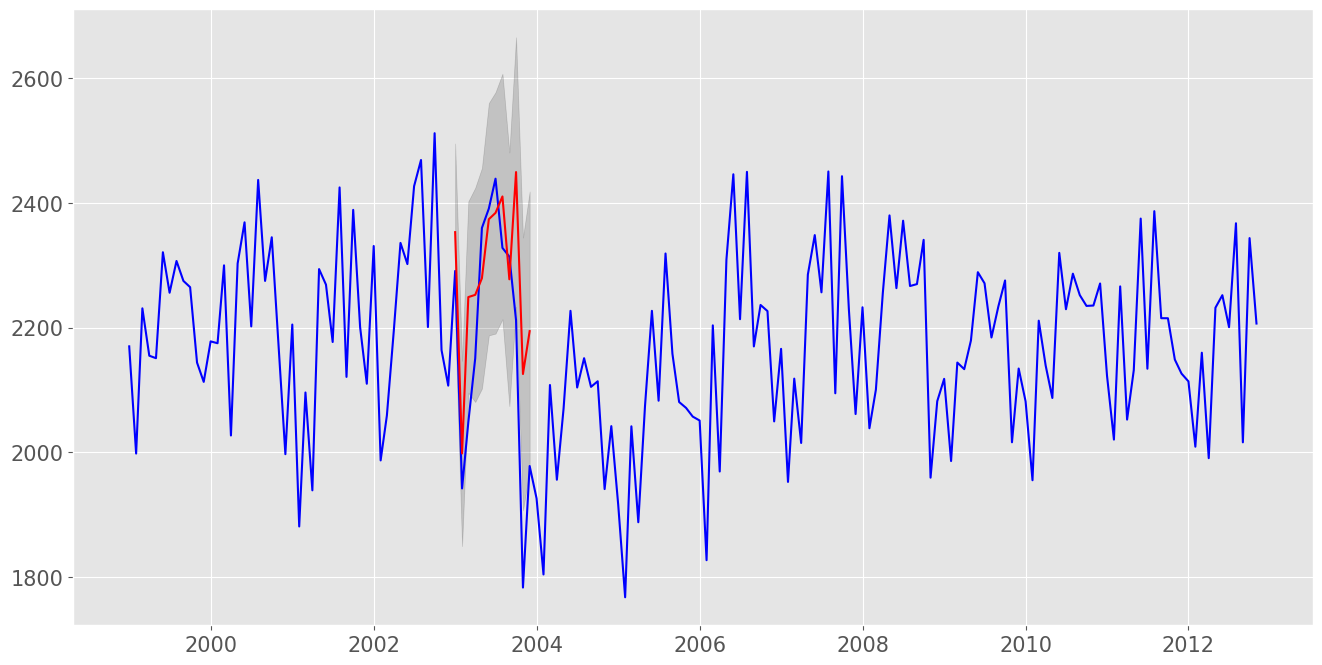

In [85]:
plt.figure(figsize=(16, 8))
plt.plot(meat["1999":]['beef'], label='Observed', color='blue')
plt.plot(predicted_mean, color='red', label='Forecast')
plt.fill_between(
    predicted_mean.index,
    lower_bound,
    upper_bound,
    color='k', alpha=.15, label='95% conf interval')

In [82]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

meat_copy = meat["2002":"2002-12-01"]

mape = mean_absolute_percentage_error(meat_copy['beef'], predicted_mean)
mse = mean_squared_error(meat_copy['beef'], predicted_mean)
rmse = np.sqrt(mse)
print("Mean Absolute Percentage Error", mape)
print("Mean Squared Error", mse)
print("RMSE", rmse)

Mean Absolute Percentage Error 0.025659364625129476
Mean Squared Error 4763.686794949452
RMSE 69.01946678256397


In [86]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

meat_copy = meat["2002":"2002-12-01"]

mape = mean_absolute_percentage_error(meat_copy['beef'], predicted_mean)
mse = mean_squared_error(meat_copy['beef'], predicted_mean)
rmse = np.sqrt(mse)
print("Mean Absolute Percentage Error", mape)
print("Mean Squared Error", mse)
print("RMSE", rmse)

Mean Absolute Percentage Error 0.02911863313037888
Mean Squared Error 6047.959119407558
RMSE 77.76862554660175


## **4. Auto ARIMA**

Stationary Check



In [69]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):


    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
tps.items()

<generator object DataFrame.items at 0x7c232ef2cf40>

In [ ]:
for name, column in tps.items():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "deg_C" 
    -----------------------------------------------
ADF Statistic: -3.559735
p-value: 0.006579
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "relative_humidity" 
    -----------------------------------------------
ADF Statistic: -6.280786
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "absolute_humidity" 
    -----------------------------------------------
ADF Statistic: -6.044781
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "sensor_1" 
    -----------------------------------------------
ADF Statistic: -8.077388
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "sensor_2" 
    -----------------------------------------------
ADF Statistic: -9.589773
p-value: 0.000000
Cr

#### train/test split

In [ ]:
# Define features (X) and target (y)
X = tps.drop(columns=['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'])
y = tps['target_carbon_monoxide']

# Split the data into train and test sets while preserving the temporal order
# We will manually create the split here (no shuffling allowed)
train_size = int(len(X) * 0.8)  # 80% for training

# Split the data based on time order
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5688, 8)
X_test shape: (1423, 8)
y_train shape: (5688,)
y_test shape: (1423,)


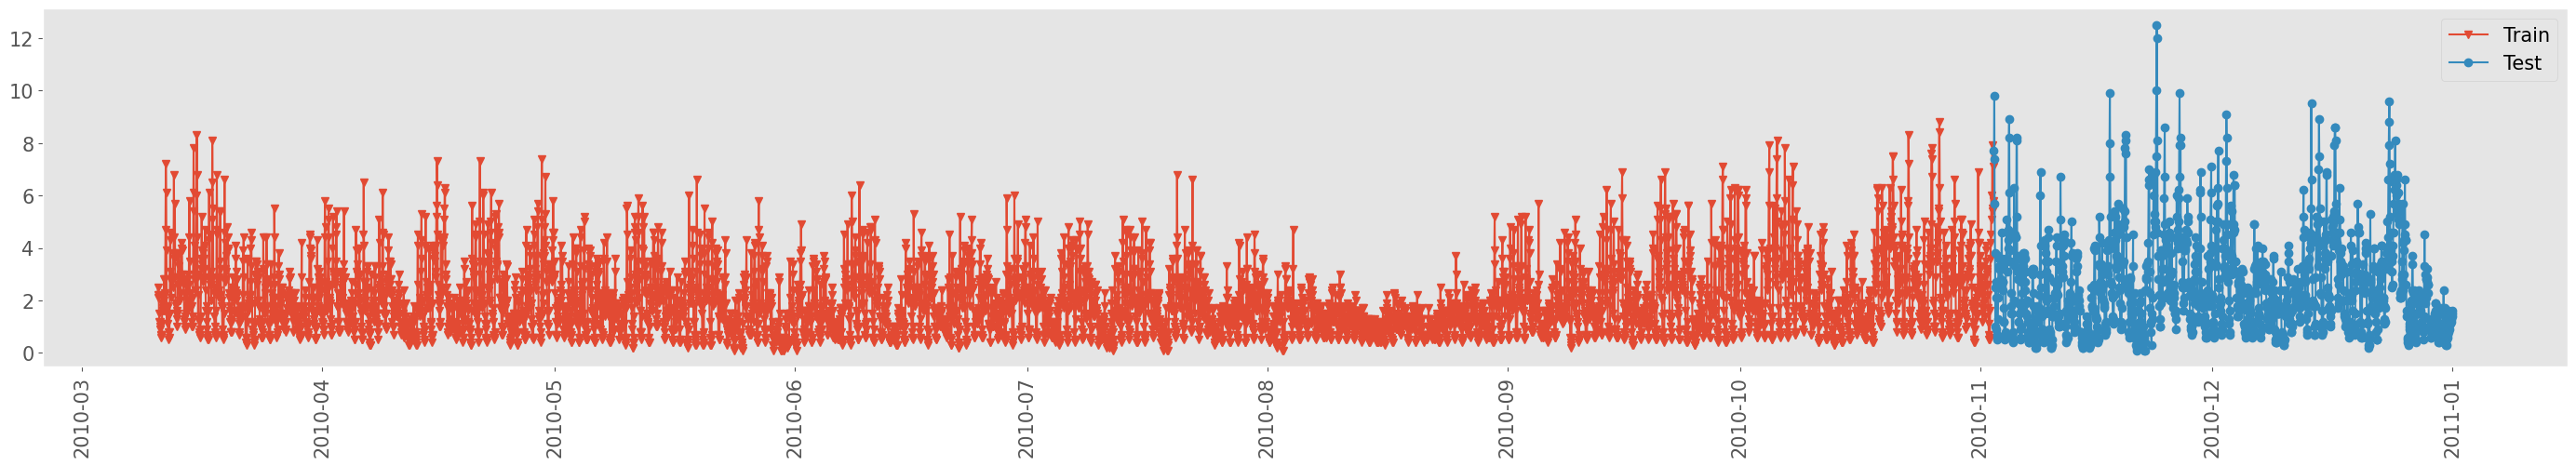

In [ ]:
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(y_train, marker='v', label='Train')
plt.plot(y_test, marker='o', label='Test')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Model-Fitting & Model Evaluation

[Auto arima doc](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html)

In [ ]:
import  pmdarima as pm
# Fit a simple auto_arima model
arima = pm.auto_arima(y_train, X=X_train, d=0,error_action='ignore', trace=True,
                      suppress_warnings=True,
                      maxiter=100,
                      m=4,
                      stationary=True,
                      test='adf')

# Print out summary information on the fit
print(arima.summary())
print(arima.params)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=8551.347, Time=87.24 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=8218.219, Time=12.61 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=5314.255, Time=47.93 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=6079.965, Time=29.62 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=8313.944, Time=37.14 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=5092.610, Time=24.73 sec
 ARIMA(1,0,0)(0,0,1)[4] intercept   : AIC=5180.203, Time=27.46 sec
 ARIMA(1,0,0)(1,0,1)[4] intercept   : AIC=5068.641, Time=98.91 sec
 ARIMA(1,0,0)(2,0,1)[4] intercept   : AIC=5095.159, Time=96.61 sec
 ARIMA(1,0,0)(1,0,2)[4] intercept   : AIC=5158.910, Time=102.40 sec
 ARIMA(1,0,0)(0,0,2)[4] intercept   : AIC=5178.022, Time=103.30 sec
 ARIMA(1,0,0)(2,0,0)[4] intercept   : AIC=5201.843, Time=92.02 sec
 ARIMA(1,0,0)(2,0,2)[4] intercept   : AIC=5127.845, Time=52.84 sec
 ARIMA(0,0,0)(1,0,1)[4] intercept   : AIC=7908.712, Time=38.14 sec
 ARIMA(2,0,0)(1,0

In [ ]:
pred=arima.predict(n_periods=100, X=test.drop(columns=['date','meantemp']), alpha=0.05)
pred

plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(train['date'][-100:],test['meantemp'], marker='o', label='Test')
plt.plot(train['date'][-100:],pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
mape=mean_absolute_percentage_error(test['meantemp'], pred)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(test['meantemp'], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)




In [ ]:
a=pd.DataFrame(test['meantemp'])
a=a.reset_index()
a=a.drop(columns='index')
a



In [ ]:
prediction=pd.DataFrame(pred)
prediction=prediction.reset_index()
prediction=prediction.drop(columns='index')
prediction
output=pd.DataFrame()
output['Test']=a['meantemp']
output['Prediction']=prediction[0]
output['Difference']=output['Test']-output['Prediction']
output['% Chnage']=abs(output['Difference']/output['Test'])*100
output

### Additional content

## 1.2.Holiday Features

In [ ]:
!pip install workalendar
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.7 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732003 sha256=c018e3d88135d2bca1f8da6e07c45a64208d69e6b8ab6a0e89b6508aef421a36
  Stored in directory: /root/.cache/pip/wheels/8f/bd/f9/5c4c39b529e0322b08979e1c465e203218bc2cca75d20f7df5
Successfully built pymeeus
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.8/36.8 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.5/141.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 26.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
from workalendar.europe.poland import Poland

Poland().holidays()

[(datetime.date(2025, 1, 1), 'New year'),
 (datetime.date(2025, 1, 6), 'Trzech Kroli'),
 (datetime.date(2025, 4, 20), 'Easter Sunday'),
 (datetime.date(2025, 4, 21), 'Easter Monday'),
 (datetime.date(2025, 5, 1), 'Labour Day'),
 (datetime.date(2025, 5, 3), 'Constitution Day'),
 (datetime.date(2025, 6, 8), 'Pentecost Sunday'),
 (datetime.date(2025, 6, 19), 'Corpus Christi'),
 (datetime.date(2025, 8, 15), 'Assumption of Mary to Heaven'),
 (datetime.date(2025, 11, 1), 'All Saints Day'),
 (datetime.date(2025, 11, 11), 'Independence Day'),
 (datetime.date(2025, 12, 25), 'Christmas Day'),
 (datetime.date(2025, 12, 26), 'Boxing Day')]

In [ ]:
from typing import List
from dateutil.relativedelta import relativedelta, TH
import datetime
from workalendar.usa import California

def create_custom_holidays(year: int) -> List:
  custom_holidays = California().holidays()

  custom_holidays.append((
  (datetime.datetime(year, 11, 1) +
   relativedelta(weekday=TH(+4)) +
   datetime.timedelta(days=1)).date(),
  "Black Friday"
  ))

  return {k: v for (k, v) in custom_holidays}


custom_holidays = create_custom_holidays(2024)
custom_holidays

{datetime.date(2025, 1, 1): 'New year',
 datetime.date(2025, 1, 20): 'Birthday of Martin Luther King, Jr.',
 datetime.date(2025, 2, 17): "Washington's Birthday",
 datetime.date(2025, 3, 31): 'Cesar Chavez Day',
 datetime.date(2025, 5, 26): 'Memorial Day',
 datetime.date(2025, 7, 4): 'Independence Day',
 datetime.date(2025, 9, 1): 'Labor Day',
 datetime.date(2025, 11, 11): 'Veterans Day',
 datetime.date(2025, 11, 27): 'Thanksgiving Day',
 datetime.date(2025, 11, 28): 'Thanksgiving Friday',
 datetime.date(2025, 12, 25): 'Christmas Day',
 datetime.date(2024, 11, 29): 'Black Friday'}

##### Now we can implement a simple lookup like this:

In [ ]:
def is_holiday(current_date: datetime.date):
  """Determine if we have a holiday."""
  return custom_holidays.get(current_date, False)

today = datetime.date(2024, 11, 29)
is_holiday(today)

'Black Friday'

## 1.3.Date Annotation

In [ ]:
import calendar
calendar.monthrange(2021, 1)

(4, 31)

In [ ]:
from datetime import date

def year_anchor(current_date: datetime.date):
  return (
    (current_date - date(current_date.year, 1, 1)).days,
    (date(current_date.year, 12, 31) - current_date).days,
  )

year_anchor(today)

(333, 32)

## 1.4 Paydays

In [ ]:
def get_last_friday(current_date: datetime.date, weekday=calendar.FRIDAY):
  return max(week[weekday] for week in calendar.monthcalendar(
      current_date.year, current_date.month
    ))

get_last_friday(today)

29

## 1.5 Seasons


In [ ]:
YEAR = 2021
seasons = [
('winter', (date(YEAR, 1, 1), date(YEAR, 3, 20))),
('spring', (date(YEAR, 3, 21), date(YEAR, 6, 20))),
('summer', (date(YEAR, 6, 21), date(YEAR, 9, 22))),
('autumn', (date(YEAR, 9, 23), date(YEAR, 12, 20))),
('winter', (date(YEAR, 12, 21), date(YEAR, 12, 31)))
]

def is_in_interval(current_date: datetime.date, seasons):
  return next(season for season, (start, end) in seasons

if start <= current_date.replace(year=YEAR) <= end)
is_in_interval(today, seasons)

'autumn'

## 1.6 The Sun and Moon

In [ ]:
!pip install astral

In [ ]:
from astral.sun import sun
from astral import LocationInfo

CITY = LocationInfo("Warsaw", "Poland", "Europe/Warsaw", 52.22977, 21.01178)

def get_sunrise_dusk(current_date: datetime.date, city_name='Warsaw'):
  s = sun(CITY.observer, date=current_date)
  sunrise = s['sunrise']
  dusk = s['dusk']
  return (dusk - sunrise).seconds / 3600

today = datetime.date(2024, 5, 24)
display(get_sunrise_dusk(today))

CITY = LocationInfo("London", "England", "Europe/London", 51.5, -0.116)
get_sunrise_dusk(today, city_name='London')

16.919722222222223

16.783055555555556

In [ ]:
today.isoformat()

'2024-05-24'

## 1.7 Business Days

In [ ]:
import pandas as pd
def get_business_days(current_date: datetime.date):
  last_day = calendar.monthrange(current_date.year, current_date.month)[1]

  rng = pd.date_range(current_date.replace(day=1), periods=last_day, freq='D')

  business_days = pd.bdate_range(rng[0], rng[-1])

  return len(business_days), last_day - len(business_days)


get_business_days(date.today())

(23, 8)

## 1.8 Automated Feature Extraction

In [ ]:
!pip install featuretools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 14.7 MB/s eta 0:00:00


In [ ]:
import featuretools as ft
from featuretools.primitives import Minute, Hour, Day, Month, Year, Weekday

data = pd.DataFrame(
{'Time': ['2014-01-01 01:41:50',
          '2014-01-01 02:06:50',
          '2014-01-01 02:31:50',
          '2014-01-01 02:56:50',
          '2014-01-01 03:21:50'],
          'Target': [0, 0, 0, 0, 1]}
)

data['index'] = data.index

es = ft.EntitySet('My EntitySet')

data['index'] = data.index

es = ft.EntitySet('My EntitySet')
es = es.add_dataframe(data,
                      'main_data_table',
                      index='index',
                      time_index='Time')

feature_matrix, features_defs = ft.dfs(entityset=es,
                                       target_dataframe_name="main_data_table",
                                       trans_primitives=[Minute, Hour, Day, Month, Year, Weekday])
feature_matrix.head(5)

/usr/local/lib/python3.11/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


,Target,DAY(Time),HOUR(Time),MINUTE(Time),MONTH(Time),WEEKDAY(Time),YEAR(Time)
index,,,,,,,
0,0,1,1,41,1,2,2014
1,0,1,2,6,1,2,2014
2,0,1,2,31,1,2,2014
3,0,1,2,56,1,2,2014
4,1,1,3,21,1,2,2014


In [ ]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.1 which is incompatible.


In [ ]:
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters
settings = ComprehensiveFCParameters()
extract_features(data, column_id='Time', default_fc_parameters=settings)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
Feature Extraction: 100%|██████████| 10/10 [00:02<00:00,  4.38it/s]


,Target__variance_larger_than_standard_deviation,Target__has_duplicate_max,Target__has_duplicate_min,Target__has_duplicate,Target__sum_values,Target__abs_energy,Target__mean_abs_change,Target__mean_change,Target__mean_second_derivative_central,Target__median,...,index__fourier_entropy__bins_5,index__fourier_entropy__bins_10,index__fourier_entropy__bins_100,index__permutation_entropy__dimension_3__tau_1,index__permutation_entropy__dimension_4__tau_1,index__permutation_entropy__dimension_5__tau_1,index__permutation_entropy__dimension_6__tau_1,index__permutation_entropy__dimension_7__tau_1,index__query_similarity_count__query_None__threshold_0.0,index__mean_n_absolute_max__number_of_maxima_7
2014-01-01 01:41:50,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:06:50,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:31:50,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:56:50,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 03:21:50,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2.ROCKET

### Convolutions

A convolution is a mathematical operation that combines two sets of information. In the context of image processing, a convolution involves a matrix called a **kernel** or **filter** that is applied to the image to produce a new image. This kernel slides over the image, and at each position, it performs a mathematical operation (usually multiplication followed by addition) to produce a single value that forms part of the output image.

For example, a sharpening kernel used to enhance edges in an image might look like this:

```
[
  0  -1  0
 -1   5 -1
  0  -1  0
]
```

When this kernel is applied to an image, it emphasizes the differences between adjacent pixels, making edges and details stand out more.

### ROCKET: RandOm Convolutional KErnel Transform

ROCKET is a method specifically designed for time-series data. Instead of using convolutions on images, it applies them to time-series data. Here's how it works:

1. **Random Kernels**: ROCKET uses random convolutional kernels. Unlike traditional approaches where kernels are learned during training, ROCKET generates random kernels with fixed weights.
  
2. **Feature Transformation**: Each time-series data point is transformed by these random kernels. The result of these transformations is used to create new features for machine learning models.

3. **Aggregate Features**: From each convolution, two main features are extracted:
   - **Global Max Pooling**: This outputs the maximum value from the convolution result.
   - **Positive Proportion Value (PPV)**: This is the proportion of positive values (values above a certain threshold) in the convolution result.

### Steps in ROCKET

1. **Apply Random Kernels**: Apply a large number (e.g., 10,000) of random kernels to the time-series data.
2. **Extract Features**: For each kernel application, extract the global max pooling value and the PPV.
3. **Feed into Machine Learning Model**: Use these extracted features as inputs to traditional machine learning algorithms like ridge regression or logistic regression.

### Key Differences from Convolutional Neural Networks (CNNs)

1. **No Hidden Layers**: ROCKET does not use hidden layers or nonlinear activation functions common in CNNs.
2. **Independent Convolutions**: The convolutions in ROCKET are applied independently to each feature, rather than hierarchically as in CNNs.

### Benefits of ROCKET

- **Speed**: ROCKET is exceptionally fast because it does not require learning the kernel weights; they are randomly initialized and fixed.
- **Accuracy**: Despite its simplicity, ROCKET achieves high accuracy by effectively transforming the time-series data into a format that machine learning algorithms can exploit.


In [ ]:
import numpy as np
from sklearn.linear_model import RidgeClassifier

# Function to apply convolution
def apply_convolution(time_series, kernel):
    return np.convolve(time_series, kernel, mode='valid')

# Function to extract features
def extract_features(convolution_result):
    global_max = np.max(convolution_result)
    ppv = np.sum(convolution_result > 0) / len(convolution_result)
    return global_max, ppv

# Generate random kernels
def generate_random_kernels(num_kernels, kernel_size):
    return [np.random.randn(kernel_size) for _ in range(num_kernels)]

# Main ROCKET transformation function
def rocket_transform(time_series_data, num_kernels=10000, kernel_size=7):
    kernels = generate_random_kernels(num_kernels, kernel_size)
    features = []
    for time_series in time_series_data:
        series_features = []
        for kernel in kernels:
            conv_result = apply_convolution(time_series, kernel)
            global_max, ppv = extract_features(conv_result)
            series_features.extend([global_max, ppv])
        features.append(series_features)
    return np.array(features)

# Example time-series data
time_series_data = [np.random.randn(100) for _ in range(10)]

# Transform the time-series data using ROCKET
transformed_data = rocket_transform(time_series_data)

# Train a classifier
classifier = RidgeClassifier()
labels = np.random.randint(0, 2, size=len(time_series_data))
classifier.fit(transformed_data, labels)

# Test the classifier
test_series = [np.random.randn(100)]
test_transformed = rocket_transform(test_series)
prediction = classifier.predict(test_transformed)

print(f"Predicted label: {prediction[0]}")

Predicted label: 1


In [ ]:
X1 = np.array([1, 7, 45, 12, 5, 3, 15, 4, 56])
y_karnel = np.random.rand(4)

X1_convolved = apply_convolution(X1, y_karnel)

display(X1, len(X1))
display(y_karnel)
display(X1_convolved, len(X1_convolved))

array([ 1,  7, 45, 12,  5,  3, 15,  4, 56])

9

array([0.75238243, 0.59801992, 0.84836427, 0.79278022])

array([42.67081555, 54.66400483, 51.10272801, 26.83498013, 18.48882239,
       59.62930023])

6

In [ ]:
sum = 0
for i, j in zip(X1[:4], y_karnel[::-1]):
  sum += i*j

sum

42.670815547700826



### Explanation

1. **apply_convolution**: This function takes a time-series and a kernel, and applies the convolution operation.
2. **extract_features**: This function extracts two features from the convolution result: the global maximum value and the positive proportion value (PPV).
3. **generate_random_kernels**: This function generates a specified number of random kernels.
4. **rocket_transform**: This function applies the ROCKET transformation to a list of time-series data, generating features using random kernels.
5. **Example time-series data**: We create some example time-series data for demonstration.
6. **Transform the time-series data**: The data is transformed using the ROCKET method.
7. **Train a classifier**: A RidgeClassifier is trained on the transformed data.
8. **Test the classifier**: We test the classifier on a new time-series and print the predicted label.


## 2.0.1 Rockets premade library

In [ ]:
from sktime.datasets import load_arrow_head
from sktime import datatypes

X_train, y_train = load_arrow_head(split="train", return_X_y=True)
# from_nested_to_2d_array
pd.DataFrame(datatypes.convert_to(X_train, to_type="numpyflat"))

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,-1.963009,-1.957825,-1.956145,-1.938289,-1.896657,-1.869857,-1.838705,-1.812289,-1.736433,-1.673329,...,-1.583857,-1.655329,-1.719153,-1.750881,-1.796273,-1.841345,-1.884289,-1.905393,-1.923905,-1.909153
1,-1.774571,-1.774036,-1.776586,-1.730749,-1.696268,-1.657377,-1.636227,-1.609807,-1.543439,-1.486174,...,-1.471688,-1.484666,-1.539972,-1.590150,-1.635663,-1.639989,-1.678683,-1.729227,-1.775670,-1.789324
2,-1.866021,-1.841991,-1.835025,-1.811902,-1.764390,-1.707687,-1.648280,-1.582643,-1.531502,-1.493609,...,-1.584132,-1.652337,-1.684565,-1.743972,-1.799117,-1.829069,-1.875828,-1.862512,-1.863368,-1.846493
3,-2.073758,-2.073301,-2.044607,-2.038346,-1.959043,-1.874494,-1.805619,-1.731043,-1.712653,-1.628022,...,-1.678942,-1.743732,-1.819801,-1.858136,-1.886146,-1.951247,-2.012927,-2.026963,-2.073405,-2.075292
4,-1.746255,-1.741263,-1.722741,-1.698640,-1.677223,-1.630356,-1.579440,-1.551225,-1.473980,-1.459377,...,-1.547111,-1.607101,-1.635137,-1.686346,-1.691274,-1.716886,-1.740726,-1.743442,-1.762729,-1.763428
5,-1.982806,-1.978861,-1.937333,-1.891442,-1.840870,-1.785316,-1.737219,-1.691963,-1.604628,-1.548823,...,-1.643531,-1.711807,-1.756963,-1.814656,-1.866867,-1.873537,-1.919679,-1.979011,-1.964868,-1.983793
6,-2.083023,-2.092058,-2.049462,-2.036784,-1.972995,-1.875811,-1.819614,-1.791114,-1.718905,-1.631890,...,-1.594615,-1.663489,-1.750787,-1.810177,-1.871056,-1.936052,-2.027489,-2.030658,-2.033118,-2.077631
7,-1.633596,-1.643175,-1.613675,-1.598907,-1.566766,-1.523893,-1.488832,-1.415548,-1.395665,-1.338432,...,-1.543739,-1.579395,-1.588658,-1.592304,-1.597549,-1.599111,-1.623552,-1.646523,-1.643044,-1.640236
8,-1.717013,-1.728059,-1.683303,-1.666821,-1.646849,-1.591460,-1.563773,-1.556125,-1.503775,-1.445509,...,-1.456607,-1.509238,-1.539390,-1.581694,-1.615883,-1.651485,-1.698773,-1.715321,-1.731976,-1.717626
9,-2.245295,-2.223850,-2.171872,-2.092627,-2.064690,-1.997025,-1.927058,-1.873990,-1.765258,-1.674180,...,-1.718327,-1.808923,-1.870409,-1.905529,-1.979643,-2.041884,-2.123160,-2.130323,-2.202741,-2.227201


In [ ]:
from sktime.transformations.panel.rocket import Rocket
rocket = Rocket(num_kernels=1000)
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)

## 2.1 Shapelets in Practice

Shapelets are an important concept in time-series analysis, and they are particularly useful for identifying meaningful subsections within time-series data that are discriminative for classification tasks. Let's explore why we learn about shapelets after ROCKET and delve into the details of shapelets.

### Why Learn Shapelets After ROCKET?

ROCKET and shapelets both focus on transforming time-series data to make it more suitable for machine learning algorithms. However, they do so in different ways:

- **ROCKET** uses random convolutional kernels to transform the entire time-series into a set of features. This approach is highly efficient and works well with linear classifiers.
- **Shapelets** identify specific subsections of the time-series that are particularly informative for distinguishing between different classes. This method focuses more on interpretability and can be computationally expensive but provides valuable insights into which parts of the time-series are most important for classification.

Learning about ROCKET first provides a foundation in time-series transformations using convolutions. Shapelets build on this by introducing a method that offers both interpretability and high performance, complementing the more black-box approach of ROCKET.

### Shapelets

Shapelets are discriminative subsections of a time-series that are used to transform the data for classification. Here's a step-by-step explanation:

1. **Learning Shapelets**: The algorithm searches for subsections (shapelets) within the time-series that maximize information gain, helping to distinguish between different classes.
2. **Shapelet Dictionary**: Once the best shapelets are identified, they are stored in a dictionary.
3. **Transformation**: Each time-series is transformed based on its similarity to the shapelets in the dictionary.
4. **Classification**: The transformed data can then be used with machine learning algorithms like decision trees or other classifiers.

### Advantages of Shapelets

- **Interpretable Results**: Shapelets provide clear and interpretable subsections of the time-series that are important for classification.
- **Fast Application**: Matching features against the shapelet dictionary can be done quickly.
- **Competitive Performance**: Machine learning algorithms that use shapelets often perform very well.



Transformed feature space shape: (36, 10)


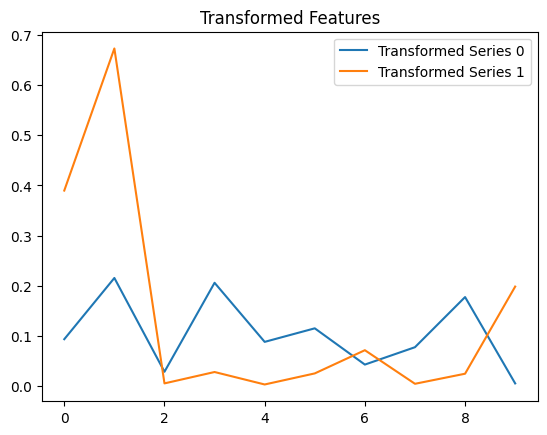

In [ ]:
import matplotlib.pyplot as plt
from sktime.transformations.panel.shapelet_transform import RandomShapeletTransform

# Parameters for shapelet extraction
time_contract_in_mins = 1
initial_num_shapelets_per_case = 10

# Initialize the RandomShapeletTransform
shapelet_transformer = RandomShapeletTransform(
    n_shapelet_samples=initial_num_shapelets_per_case,
    max_shapelet_length=None,  # You can specify this based on your data
    random_state=0
)

# Fit the transformer to the training data
shapelet_transformer.fit(X_train, y_train)

# Transform the dataset to shapelet distance space
transformed_features = shapelet_transformer.transform(X_train)

# Inspect transformed features
print("Transformed feature space shape:", transformed_features.shape)

# (Optional) Plot some shapelet-transformed data
plt.plot(transformed_features.iloc[0], label="Transformed Series 0")
plt.plot(transformed_features.iloc[1], label="Transformed Series 1")
plt.title("Transformed Features")
plt.legend()
plt.show()

In [ ]:
from sktime.transformers.series_as_features.shapelets import ContractedShapeletTransform# How long (in minutes) to extract shapelets for.
time_contract_in_mins = 1

# The initial number of shapelet candidates to assess per training series.
initial_num_shapelets_per_case = 10

ShapeletTransformer = ContractedShapeletTransform(time_contract_in_mins=time_contract_in_mins,
num_candidates_to_sample_per_case=initial_num_shapelets_per_case)

ShapeletTransformer.fit(train_x, train_y)#Plot the shapelets

for i in range(0,min(len(ShapeletTransformer.shapelets),5)):
    s = ShapeletTransformer.shapelets[i]
    # summary info about the shapelet
    print("#"+str(i)+": "+str(s))

    # overlay shapelets
    plt.plot(
        list(range(s.start_pos,(s.start_pos+s.length))),
        train_x.iloc[s.series_id,0][s.start_pos:s.start_pos+s.length]
    )

plt.show()

ModuleNotFoundError: No module named 'sktime.transformers'

In [ ]:
from sktime.transformations.panel.shapelet_transform import ContractedShapeletTransform

shapelets_transform = ContractedShapeletTransform(
  time_contract_in_mins=1,
  num_candidates_to_sample_per_case=10,
  verbose=0,
)

shapelets_transform.fit(X_train, y_train)

In [ ]:
import numpy as np
from sktime.datasets import load_arrow_head
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Load dataset
X_train, y_train = load_arrow_head(split="train", return_X_y=True)
X_test, y_test = load_arrow_head(split="test", return_X_y=True)
X_train.shape

In [ ]:
X_train.iloc[0].to_numpy()

In [ ]:


# Define the shapelet transform and classifier
shapelet_transform = ShapeletTransform(max_shapelets_to_store_per_class=10, verbose=1)
classifier = TimeSeriesForestClassifier(n_estimators=10)

# Create a pipeline with the shapelet transform and classifier
pipeline = Pipeline([
    ("shapelet_transform", shapelet_transform),
    ("classifier", classifier)
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
!pip install tslearn

In [ ]:
import numpy as np
from tslearn.shapelets import ShapeletModel, grabocka_params_to_shapelet_size_dict
from tslearn.datasets import CachedDatasets
from tslearn.utils import to_time_series_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load example dataset
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

# Preprocess the data
X_train = to_time_series_dataset(X_train)
X_test = to_time_series_dataset(X_test)

# Label encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Define Shapelet model parameters
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=X_train.shape[0], ts_sz=X_train.shape[1], n_classes=len(set(y_train)), l=0.1, r=1)

# Initialize and fit the Shapelet model
shapelet_model = ShapeletModel(n_shapelets_per_size=shapelet_sizes, optimizer="sgd", weight_regularizer=0.01, max_iter=200)
shapelet_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = shapelet_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

In [ ]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sktime.datasets import load_arrow_head
from sktime.transformations.panel.shapelet_transform import RandomShapeletTransform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the ArrowHead dataset
X, y = load_arrow_head(split="train", return_X_y=True)

# Check the data type
print("Data type:", type(X))

# Ensure the data is in nested format (should already be for ArrowHead)
# If not, convert it using from_2d_array_to_nested
# X = from_2d_array_to_nested(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomShapeletTransform
shapelet_transformer = RandomShapeletTransform(
    n_shapelet_samples=100,  # Number of shapelets
    max_shapelet_length=30,  # Maximum length of shapelets
    random_state=42
)

# Fit the transformer and transform the training data
shapelet_transformer.fit(X_train, y_train)
X_train_transformed = shapelet_transformer.transform(X_train)
X_test_transformed = shapelet_transformer.transform(X_test)

# Print the transformed feature space shape
print(f"Transformed feature space shape: {X_train_transformed.shape}")

# Train a classifier on the transformed data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_transformed)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualizing feature importances
importances = classifier.feature_importances_
sorted_idx = np.argsort(importances)[::-1][:10]  # Top 10 important features

plt.figure(figsize=(10, 6))
plt.bar(range(10), importances[sorted_idx])
plt.title("Top 10 Shapelet Feature Importances")
plt.xlabel("Shapelet Index")
plt.ylabel("Importance")
plt.xticks(range(10), sorted_idx, rotation=45)
plt.show()


In [ ]:
X_train

In [ ]:
 y_train